In [1]:
using LinearAlgebra
using Plots
using MAT
using Statistics

# TODO
---
1. fix Katz $\epsilon$ value
2. Plot all three compliances
3. Plot for limit cycle
4. Plot for gust

# Centrality Measures
---

### Katz
$${\bf x} = ({\bf I} - \alpha {\bf A})^{-1} {\bf 1}$$


### Issues
---

- Signed network
- Centrality of each node
- System-as-node centrality
- Left eigenvector (out) centrality
- $\alpha$ or $\epsilon$ in Katz centrality


### Types
---

- total
- node
- system-as-node

In [2]:
function KatzCentrality(A::AbstractArray, α::Real)

    # val, vec = eigen(A);
    # val = real.(val);

    # α = 1/val[1] - ϵ;

    I = Diagonal(ones(size(A)[1]));

    Vone = ones(size(A)[1]);

    return inv(I - α.*A)*Vone

end

function EigenCentrality(A::AbstractArray)

    val, vec = eigen(A)
    val = real.(val)
    vec = real.(vec)
    indx = findall(x-> x == maximum(val), val)

    return abs.(vec[:,indx])/maximum(abs.(vec[:,indx]))

end

function DegreeCentrality(A::AbstractArray, type::String)

    if type == "in"
        return sum(A, dims = 1)'
    elseif type == "out"
        return sum(A, dims = 2)
    end

end

DegreeCentrality (generic function with 1 method)

# Load in Data
---

In [3]:
# load in dataset

fname = "network_info_0.3125.mat";

matFile = matread(fname);

network_info = matFile["network_info"];

# ----------------------------------------

# load in dataset

fname = "network_info_0.625.mat";

matFile = matread(fname);

network_info_625 = matFile["network_info"];

# load in dataset

fname = "network_info_0.3125.mat";

matFile = matread(fname);

network_info_3125 = matFile["network_info"];

# load in dataset

fname = "network_info_0.15625.mat";

matFile = matread(fname);

network_info_15625 = matFile["network_info"];

# ----------------------------------------

# load in dataset

fname = "y_body_sweep.mat";

matFile = matread(fname);

y_body_15625 = matFile["y_body_15625"];
y_body_3125 = matFile["y_body_3125"];
y_body_625 = matFile["y_body_625"];

# System Centrality Measures (system as node)
---


$$ S = \begin{bmatrix}
\mathcal{A}_{1} & \mathcal{W}_{1,2}\\
\mathcal{W}_{2,1} & \mathcal{A}_{2} \\
\end{bmatrix}$$

$$s^{in}_i = \sum_j \mathcal{W}_{j,i}$$
$$s^{out}_i = \sum_j \mathcal{W}_{i,j}$$

In [4]:
in_deg  = [];
out_deg = [];
eig     = [];
katz    = [];

network_data = deepcopy(network_info_625)

for i = 1:1:1001

    S = network_data[i,3];
    W = deepcopy(S);

    A_fluid = network_data[i,1];
    A_structure = network_data[i,2];

    nodes_fluid = size(A_fluid)[1];
    nodes_structure = size(A_structure)[1];

    W[1:nodes_structure, 1:nodes_structure] .= 0;
    W[(size(W)[1]+1)-nodes_fluid:end, (size(W)[1]+1)-nodes_fluid:end] .= 0;

    push!(in_deg, sum(sum(W[:,1:nodes_structure])))#sum(DegreeCentrality(W, "in")))
    push!(out_deg, sum(sum(W[:,(nodes_structure+1):end])))#sum(DegreeCentrality(W, "out")))
    push!(eig, sum(EigenCentrality(W)))
    push!(katz, sum(KatzCentrality(W, 0.01)))

end

---

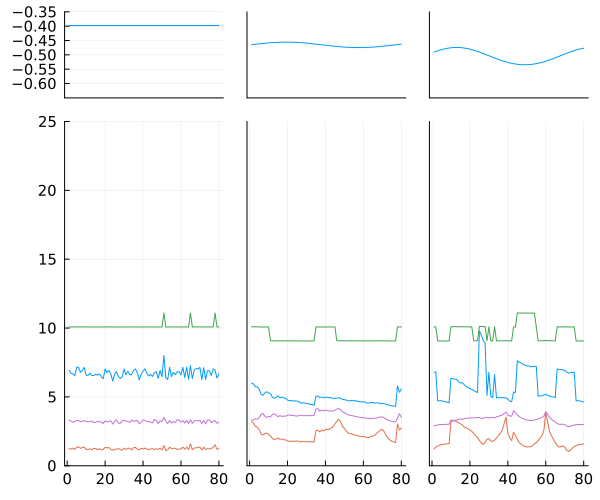

In [5]:
f_size = 10

# ------------------------------------------------------------

in_deg  = [];
out_deg = [];
eig     = [];
katz    = [];

network_data = deepcopy(network_info_15625)

for i = 1:1:80

    S = network_data[i,3];
    W = deepcopy(S);

    A_fluid = network_data[i,1];
    A_structure = network_data[i,2];

    nodes_fluid = size(A_fluid)[1];
    nodes_structure = size(A_structure)[1];

    W[1:nodes_structure, 1:nodes_structure] .= 0;
    W[(size(W)[1]+1)-nodes_fluid:end, (size(W)[1]+1)-nodes_fluid:end] .= 0;

    push!(in_deg, sum(sum(W[:,1:nodes_structure])))#sum(DegreeCentrality(W, "in")))
    push!(out_deg, sum(sum(W[:,(nodes_structure+1):end])))#sum(DegreeCentrality(W, "out")))
    push!(eig, sum(EigenCentrality(W)))
    push!(katz, sum(KatzCentrality(W, 0.01)))

end


p1 = plot(y_body_15625[end,Int64(70000/20):Int64(70000/20)+80], legend = :false, ylim = (-0.65, -0.35), xtickfontsize = f_size, ytickfontsize = f_size, xticks = false)

p2 = plot()
plot!(in_deg, label = "in-degree")
plot!(out_deg, label = "out-degree")
plot!(katz, label = "Katz centrality")
plot!(eig, label = "eigenvector centrality", ylim = (0, 25), xtickfontsize = f_size, ytickfontsize = f_size)

pp1 = plot(p1, p2, layout = grid(2,1, heights=[0.2, 0.8]), legend = :false)

# ------------------------------------------------------------

in_deg  = [];
out_deg = [];
eig     = [];
katz    = [];

network_data = deepcopy(network_info_3125)

for i = 1:1:80

    S = network_data[i,3];
    W = deepcopy(S);

    A_fluid = network_data[i,1];
    A_structure = network_data[i,2];

    nodes_fluid = size(A_fluid)[1];
    nodes_structure = size(A_structure)[1];

    W[1:nodes_structure, 1:nodes_structure] .= 0;
    W[(size(W)[1]+1)-nodes_fluid:end, (size(W)[1]+1)-nodes_fluid:end] .= 0;

    push!(in_deg, sum(sum(W[:,1:nodes_structure])))#sum(DegreeCentrality(W, "in")))
    push!(out_deg, sum(sum(W[:,(nodes_structure+1):end])))#sum(DegreeCentrality(W, "out")))
    push!(eig, sum(EigenCentrality(W)))
    push!(katz, sum(KatzCentrality(W, 0.01)))

end


p1 = plot(y_body_3125[end,Int64(70000/20):Int64(70000/20)+80], legend = :false, ylim = (-0.65, -0.35), xtickfontsize = f_size, ytickfontsize = f_size, xticks = false, yticks = false)

p2 = plot()
plot!(in_deg, label = "in-degree")
plot!(out_deg, label = "out-degree")
plot!(katz, label = "Katz centrality")
plot!(eig, label = "eigenvector centrality", ylim = (0, 25), xtickfontsize = f_size, ytickfontsize = f_size, yticks = false)

pp2 = plot(p1, p2, layout = grid(2,1, heights=[0.2, 0.8]), legend = :false)

# ------------------------------------------------------------

in_deg  = [];
out_deg = [];
eig     = [];
katz    = [];

network_data = deepcopy(network_info_625)

for i = 1:1:80

    S = network_data[i,3];
    W = deepcopy(S);

    A_fluid = network_data[i,1];
    A_structure = network_data[i,2];

    nodes_fluid = size(A_fluid)[1];
    nodes_structure = size(A_structure)[1];

    W[1:nodes_structure, 1:nodes_structure] .= 0;
    W[(size(W)[1]+1)-nodes_fluid:end, (size(W)[1]+1)-nodes_fluid:end] .= 0;

    push!(in_deg, sum(sum(W[:,1:nodes_structure])))#sum(DegreeCentrality(W, "in")))
    push!(out_deg, sum(sum(W[:,(nodes_structure+1):end])))#sum(DegreeCentrality(W, "out")))
    push!(eig, sum(EigenCentrality(W)))
    push!(katz, sum(KatzCentrality(W, 0.01)))

end


p1 = plot(y_body_625[end,Int64(70000/20):Int64(70000/20)+80], legend = :false, ylim = (-0.65, -0.35), xtickfontsize = f_size, ytickfontsize = f_size, xticks = false, yticks = false)

p2 = plot()
plot!(in_deg, label = "in-degree")
plot!(out_deg, label = "out-degree")
plot!(katz, label = "Katz centrality")
plot!(eig, label = "eigenvector centrality", ylim = (0, 25), xtickfontsize = f_size, ytickfontsize = f_size, yticks = false)

pp3 = plot(p1, p2, layout = grid(2,1, heights=[0.2, 0.8]), legend = :false)

# ------------------------------------------------------------

ppp1 = plot(pp1, pp2, pp3, layout = grid(1, 3), size = (600, 500))

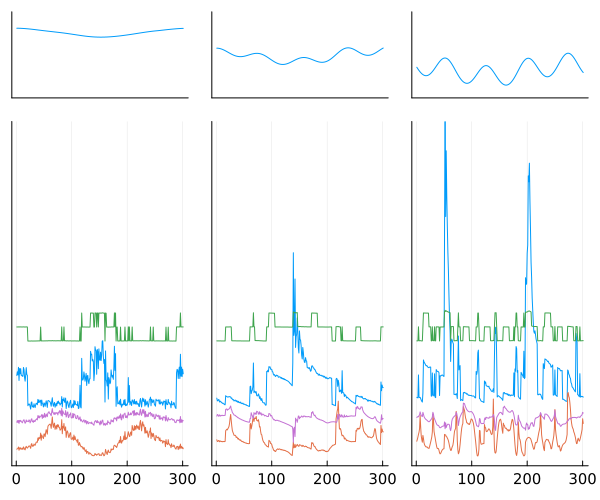

In [6]:
f_size = 10

# ------------------------------------------------------------

in_deg  = [];
out_deg = [];
eig     = [];
katz    = [];

network_data = deepcopy(network_info_15625)

for i = 250:1:550

    S = network_data[i,3];
    W = deepcopy(S);

    A_fluid = network_data[i,1];
    A_structure = network_data[i,2];

    nodes_fluid = size(A_fluid)[1];
    nodes_structure = size(A_structure)[1];

    W[1:nodes_structure, 1:nodes_structure] .= 0;
    W[(size(W)[1]+1)-nodes_fluid:end, (size(W)[1]+1)-nodes_fluid:end] .= 0;

    push!(in_deg, sum(sum(W[:,1:nodes_structure])))#sum(DegreeCentrality(W, "in")))
    push!(out_deg, sum(sum(W[:,(nodes_structure+1):end])))#sum(DegreeCentrality(W, "out")))
    push!(eig, sum(EigenCentrality(W)))
    push!(katz, sum(KatzCentrality(W, 0.01)))

end


p1 = plot(y_body_15625[end,Int64(75000/20):Int64(75000/20)+300], legend = :false, ylim = (-0.6, -0.35), xtickfontsize = f_size, ytickfontsize = f_size, xticks = false, yticks = false)

p2 = plot()
plot!(in_deg, label = "in-degree")
plot!(out_deg, label = "out-degree")
plot!(katz, label = "Katz centrality")
plot!(eig, label = "eigenvector centrality", ylim = (0, 25), xtickfontsize = f_size, ytickfontsize = f_size, yticks = false)

pp1 = plot(p1, p2, layout = grid(2,1, heights=[0.2, 0.8]), legend = :false)

# ------------------------------------------------------------

in_deg  = [];
out_deg = [];
eig     = [];
katz    = [];

network_data = deepcopy(network_info_3125)

for i = 250:1:550

    S = network_data[i,3];
    W = deepcopy(S);

    A_fluid = network_data[i,1];
    A_structure = network_data[i,2];

    nodes_fluid = size(A_fluid)[1];
    nodes_structure = size(A_structure)[1];

    W[1:nodes_structure, 1:nodes_structure] .= 0;
    W[(size(W)[1]+1)-nodes_fluid:end, (size(W)[1]+1)-nodes_fluid:end] .= 0;

    push!(in_deg, sum(sum(W[:,1:nodes_structure])))#sum(DegreeCentrality(W, "in")))
    push!(out_deg, sum(sum(W[:,(nodes_structure+1):end])))#sum(DegreeCentrality(W, "out")))
    push!(eig, sum(EigenCentrality(W)))
    push!(katz, sum(KatzCentrality(W, 0.01)))

end


p1 = plot(y_body_3125[end,Int64(75000/20):Int64(75000/20)+300], legend = :false, ylim = (-0.6, -0.35), xtickfontsize = f_size, ytickfontsize = f_size, xticks = false, yticks = false)

p2 = plot()
plot!(in_deg, label = "in-degree")
plot!(out_deg, label = "out-degree")
plot!(katz, label = "Katz centrality")
plot!(eig, label = "eigenvector centrality", ylim = (0, 25), xtickfontsize = f_size, ytickfontsize = f_size, yticks = false)

pp2 = plot(p1, p2, layout = grid(2,1, heights=[0.2, 0.8]), legend = :false)

# ------------------------------------------------------------

in_deg  = [];
out_deg = [];
eig     = [];
katz    = [];

network_data = deepcopy(network_info_625)

for i = 250:1:550

    S = network_data[i,3];
    W = deepcopy(S);

    A_fluid = network_data[i,1];
    A_structure = network_data[i,2];

    nodes_fluid = size(A_fluid)[1];
    nodes_structure = size(A_structure)[1];

    W[1:nodes_structure, 1:nodes_structure] .= 0;
    W[(size(W)[1]+1)-nodes_fluid:end, (size(W)[1]+1)-nodes_fluid:end] .= 0;

    push!(in_deg, sum(sum(W[:,1:nodes_structure])))#sum(DegreeCentrality(W, "in")))
    push!(out_deg, sum(sum(W[:,(nodes_structure+1):end])))#sum(DegreeCentrality(W, "out")))
    push!(eig, sum(EigenCentrality(W)))
    push!(katz, sum(KatzCentrality(W, 0.01)))

end


p1 = plot(y_body_625[end,Int64(75000/20):Int64(75000/20)+300], legend = :false, ylim = (-0.6, -0.35), xtickfontsize = f_size, ytickfontsize = f_size, xticks = false, yticks = false)

p2 = plot()
plot!(in_deg, label = "in-degree")
plot!(out_deg, label = "out-degree")
plot!(katz, label = "Katz centrality")
plot!(eig, label = "eigenvector centrality", ylim = (0, 25), tickfontsize = f_size, yticks = :false)

pp3 = plot(p1, p2, layout = grid(2,1, heights=[0.2, 0.8]), legend = :false)

# ------------------------------------------------------------

ppp2 = plot(pp1, pp2, pp3, layout = grid(1, 3), size = (600, 500))

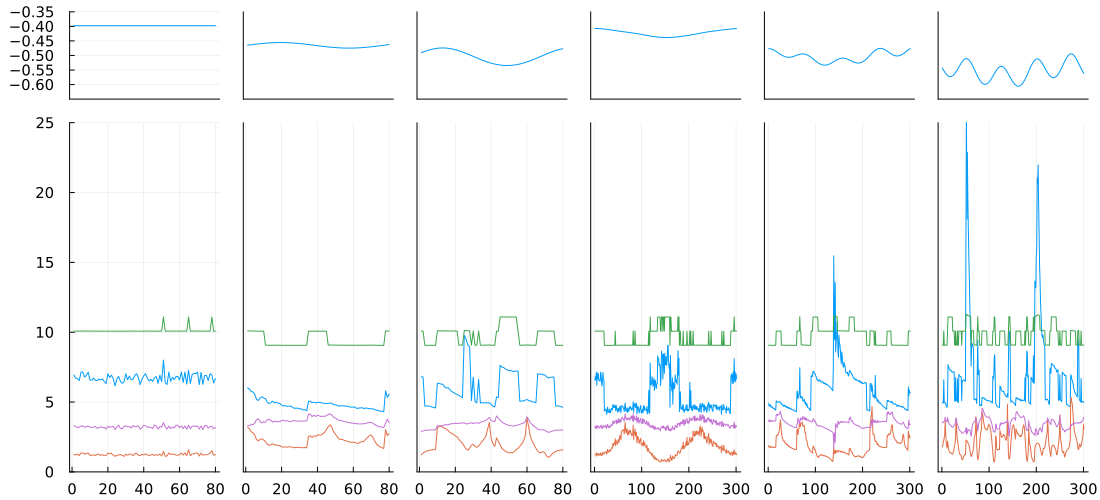

In [7]:
p_save = plot(ppp1, ppp2, layout = grid(1,2), size = (1100, 500))

# New Plots
---

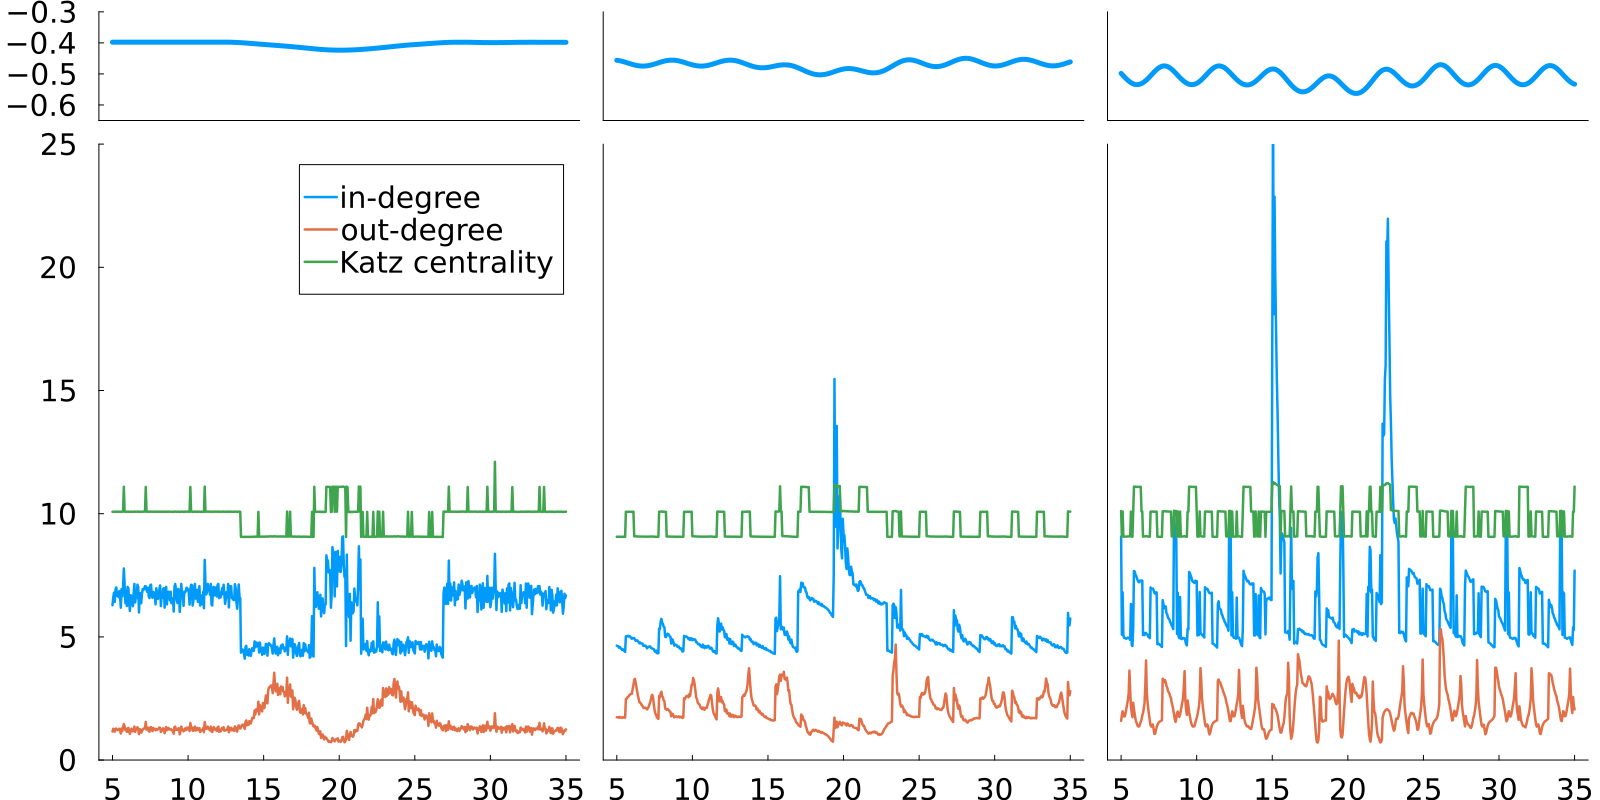

In [8]:
f_size = 20

lw_1 = 2.5
lw_2 = 5

start = 100
stop = 700

Δt = 0.05
t_span = range(100*Δt, (100 + (stop-start))*Δt, length = (1 + stop - start))

# ------------------------------------------------------------

in_deg  = [];
out_deg = [];
eig     = [];
katz    = [];

network_data = deepcopy(network_info_15625)

for i = start:1:stop

    S = network_data[i,3];
    W = deepcopy(S);

    A_fluid = network_data[i,1];
    A_structure = network_data[i,2];

    nodes_fluid = size(A_fluid)[1];
    nodes_structure = size(A_structure)[1];

    W[1:nodes_structure, 1:nodes_structure] .= 0;
    W[(size(W)[1]+1)-nodes_fluid:end, (size(W)[1]+1)-nodes_fluid:end] .= 0;

    push!(in_deg, sum(sum(W[:,1:nodes_structure])))#sum(DegreeCentrality(W, "in")))
    push!(out_deg, sum(sum(W[:,(nodes_structure+1):end])))#sum(DegreeCentrality(W, "out")))
    push!(eig, sum(EigenCentrality(W)))
    push!(katz, sum(KatzCentrality(W, 0.01)))

end


p1 = plot(t_span, y_body_15625[end,Int64(70000/20)+start:Int64(70000/20)+stop], legend = :false, ylim = (-0.65, -0.3), xtickfontsize = f_size, ytickfontsize = f_size, xticks = false, linewidth = lw_2)

p2 = plot()
plot!(t_span,in_deg, label = "in-degree", linewidth = lw_1)
plot!(t_span,out_deg, label = "out-degree", linewidth = lw_1)
plot!(t_span,katz, label = "Katz centrality", linewidth = lw_1, ylim = (0, 25), xtickfontsize = f_size, ytickfontsize = f_size, labelfontsize = f_size, legendfontsize = f_size,)
# plot!(t_span, eig, label = "eigenvector centrality", ylim = (0, 25), xtickfontsize = f_size, ytickfontsize = f_size, linewidth = lw_1)

pp1 = plot(p1, p2, layout = grid(2,1, heights=[0.15, 0.85]), grid = :false)

# ------------------------------------------------------------

in_deg  = [];
out_deg = [];
eig     = [];
katz    = [];

network_data = deepcopy(network_info_3125)

for i = start:1:stop

    S = network_data[i,3];
    W = deepcopy(S);

    A_fluid = network_data[i,1];
    A_structure = network_data[i,2];

    nodes_fluid = size(A_fluid)[1];
    nodes_structure = size(A_structure)[1];

    W[1:nodes_structure, 1:nodes_structure] .= 0;
    W[(size(W)[1]+1)-nodes_fluid:end, (size(W)[1]+1)-nodes_fluid:end] .= 0;

    push!(in_deg, sum(sum(W[:,1:nodes_structure])))#sum(DegreeCentrality(W, "in")))
    push!(out_deg, sum(sum(W[:,(nodes_structure+1):end])))#sum(DegreeCentrality(W, "out")))
    push!(eig, sum(EigenCentrality(W)))
    push!(katz, sum(KatzCentrality(W, 0.01)))

end


p1 = plot(t_span, y_body_3125[end,Int64(70000/20)+start:Int64(70000/20)+stop], legend = :false, ylim = (-0.65, -0.3), xtickfontsize = f_size, ytickfontsize = f_size, xticks = false, yticks = false, linewidth = lw_2)

p2 = plot()
plot!(t_span,in_deg, label = "in-degree", linewidth = lw_1)
plot!(t_span,out_deg, label = "out-degree", linewidth = lw_1)
plot!(t_span,katz, label = "Katz centrality", linewidth = lw_1, ylim = (0, 25), xtickfontsize = f_size, ytickfontsize = f_size, yticks = false)
# plot!(t_span, eig, label = "eigenvector centrality", ylim = (0, 25), xtickfontsize = f_size, ytickfontsize = f_size, linewidth = lw_1, yticks = false)

pp2 = plot(p1, p2, layout = grid(2,1, heights=[0.15, 0.85]), legend = :false, grid = :false)

# ------------------------------------------------------------

in_deg  = [];
out_deg = [];
eig     = [];
katz    = [];

network_data = deepcopy(network_info_625)

for i = start:1:stop

    S = network_data[i,3];
    W = deepcopy(S);

    A_fluid = network_data[i,1];
    A_structure = network_data[i,2];

    nodes_fluid = size(A_fluid)[1];
    nodes_structure = size(A_structure)[1];

    W[1:nodes_structure, 1:nodes_structure] .= 0;
    W[(size(W)[1]+1)-nodes_fluid:end, (size(W)[1]+1)-nodes_fluid:end] .= 0;

    push!(in_deg, sum(sum(W[:,1:nodes_structure])))#sum(DegreeCentrality(W, "in")))
    push!(out_deg, sum(sum(W[:,(nodes_structure+1):end])))#sum(DegreeCentrality(W, "out")))
    push!(eig, sum(EigenCentrality(W)))
    push!(katz, sum(KatzCentrality(W, 0.01)))

end


p1 = plot(t_span, y_body_625[end,Int64(70000/20)+start:Int64(70000/20)+stop], legend = :false, ylim = (-0.65, -0.3), xtickfontsize = f_size, ytickfontsize = f_size, xticks = false, yticks = false, linewidth = lw_2)

p2 = plot()
plot!(t_span,in_deg, label = "in-degree", linewidth = lw_1)
plot!(t_span,out_deg, label = "out-degree", linewidth = lw_1)
plot!(t_span,katz, label = "Katz centrality", linewidth = lw_1, ylim = (0, 25), xtickfontsize = f_size, ytickfontsize = f_size, yticks = :false)
# plot!(t_span, eig, label = "eigenvector centrality"

pp3 = plot(p1, p2, layout = grid(2,1, heights=[0.15, 0.85]), legend = :false, grid = :false)

# ------------------------------------------------------------

plot(pp1, pp2, pp3, layout = grid(1, 3))

p_save = plot!(size = (1600, 800))#(dpi = 300)

savefig(p_save,"./publication_plots/test.png")

p_save

---

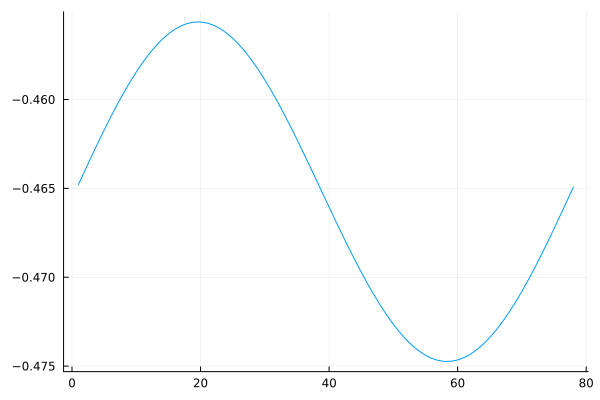

In [9]:
plot(y_body_3125[end,Int64(70000/20):Int64(70000/20)+77], legend = :false)

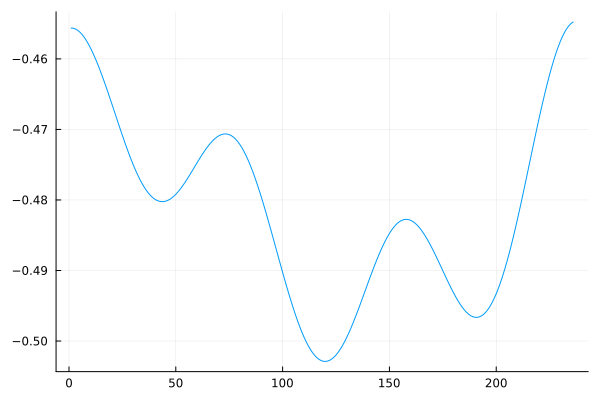

In [10]:
plot(y_body_3125[end,Int64(75000/20):Int64(75000/20)+235], legend = :false)

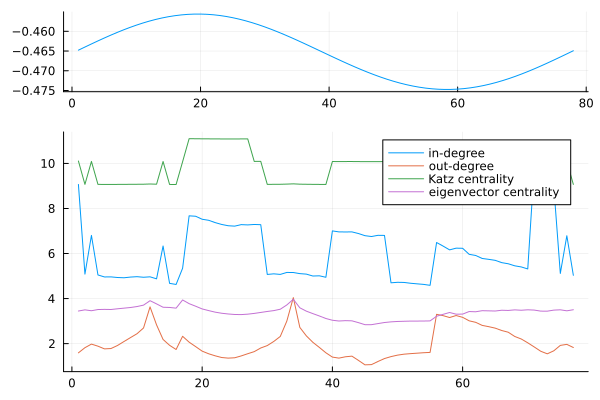

In [11]:
p1 = plot(y_body_3125[end,Int64(70000/20):Int64(70000/20)+77], legend = :false)

p2 = plot()
plot!(in_deg[1:77], label = "in-degree")
plot!(out_deg[1:77], label = "out-degree")
plot!(katz[1:77], label = "Katz centrality")
plot!(eig[1:77], label = "eigenvector centrality")

plot(p1, p2, layout = grid(2,1, heights=[0.25, 0.75]))

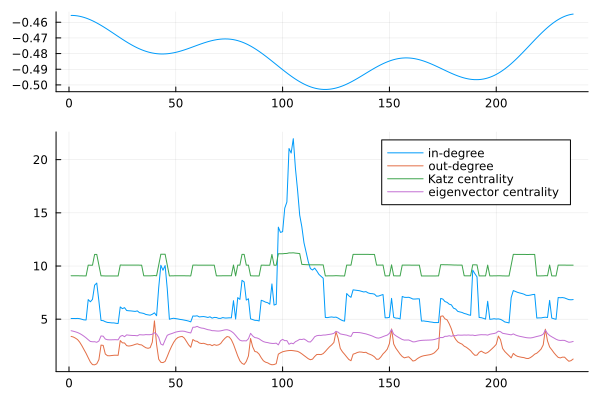

In [12]:
p1 = plot(y_body_3125[end,Int64(75000/20):Int64(75000/20)+235], legend = :false)

p2 = plot()
plot!(in_deg[250:485], label = "in-degree")
plot!(out_deg[250:485], label = "out-degree")
plot!(katz[250:485], label = "Katz centrality")
plot!(eig[250:485], label = "eigenvector centrality")

plot(p1, p2, layout = grid(2,1, heights=[0.25, 0.75]))

---

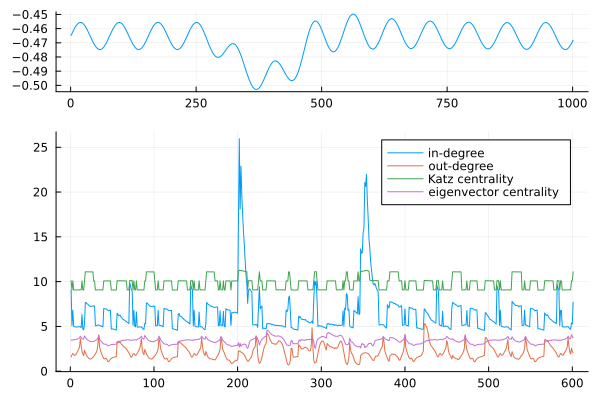

In [13]:
p1 = plot(y_body_3125[end,Int64(70000/20):Int64(90000/20)], legend = :false)

p2 = plot()
plot!(in_deg, label = "in-degree")
plot!(out_deg, label = "out-degree")
plot!(katz, label = "Katz centrality")
plot!(eig, label = "eigenvector centrality")

plot(p1, p2, layout = grid(2,1, heights=[0.25, 0.75]))

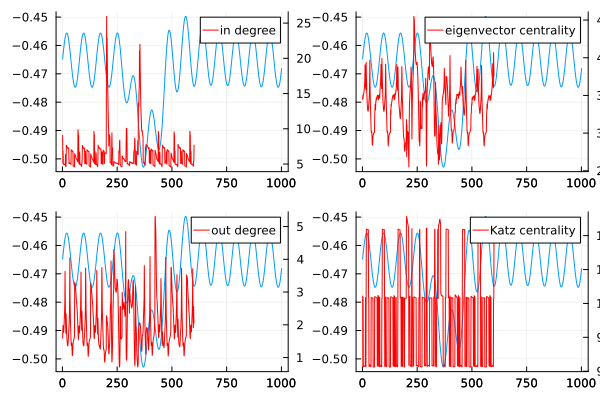

In [14]:
plot(y_body_3125[end,Int64(70000/20):Int64(90000/20)], legend = :false)
p3 = plot!(twinx(), out_deg, label = "out degree", color = :red)

plot(y_body_3125[end,Int64(70000/20):Int64(90000/20)], legend = :false)
p1 = plot!(twinx(), in_deg, label = "in degree", color = :red)

plot(y_body_3125[end,Int64(70000/20):Int64(90000/20)], legend = :false)
p2 = plot!(twinx(), eig, label = "eigenvector centrality", color = :red)

plot(y_body_3125[end,Int64(70000/20):Int64(90000/20)], legend = :false)
p4 = plot!(twinx(), katz, label = "Katz centrality", color = :red)

plot(p1, p2, p3, p4, layout = grid(2,2))

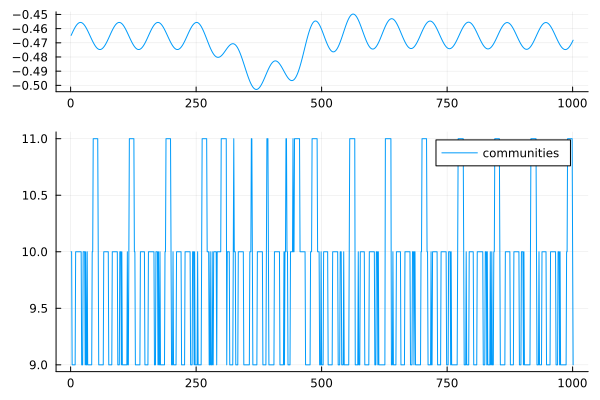

In [15]:
W_hist = []

for i = 1:1:1001

    S = network_data[i,3];
    push!(W_hist, size(S)[1]);

end

p1 = plot(y_body_3125[end,Int64(70000/20):Int64(90000/20)], legend = :false)
p2 = plot(W_hist, label = "communities")

plot(p1, p2, layout = grid(2,1, heights=[0.25, 0.75]))

# Community Centrality Measures
---

In [16]:
in_deg  = [];
out_deg = [];
eig     = [];
katz    = [];


for i = 1:1:1001

    S = deepcopy(network_info_15625[i,3]);
    global W = deepcopy(S);

    A_fluid = network_info_15625[i,1];
    A_structure = network_info_15625[i,2];

    global nodes_fluid = size(A_fluid)[1];
    global nodes_structure = size(A_structure)[1];

    W[1:nodes_structure, 1:nodes_structure] .= 0;
    W[(size(W)[1]+1)-nodes_fluid:end, (size(W)[1]+1)-nodes_fluid:end] .= 0;

    # push!(in_deg, (sum(W[:,1:nodes_structure])))#sum(DegreeCentrality(W, "in")))
    # push!(out_deg, (sum(W[:,(nodes_structure+1):end])))#sum(DegreeCentrality(W, "out")))
    # push!(eig, (EigenCentrality(W)))
    # push!(katz, (KatzCentrality(W, 0.01)))

end

┌ Warning: Keyword argument letter not supported with Plots.GRBackend().  Choose from: annotations, arrow, aspect_ratio, background_color, background_color_inside, background_color_outside, background_color_subplot, bar_width, bins, bottom_margin, camera, clims, color_palette, colorbar, colorbar_entry, colorbar_scale, colorbar_title, connections, contour_labels, discrete_values, fill_z, fillalpha, fillcolor, fillrange, fillstyle, flip, foreground_color, foreground_color_axis, foreground_color_border, foreground_color_grid, foreground_color_subplot, foreground_color_text, framestyle, grid, gridalpha, gridlinewidth, gridstyle, group, guide, guidefontcolor, guidefontfamily, guidefonthalign, guidefontrotation, guidefontsize, guidefontvalign, html_output_format, inset_subplots, label, layout, left_margin, legend_background_color, legend_font_color, legend_font_family, legend_font_halign, legend_font_pointsize, legend_font_rotation, legend_font_valign, legend_foreground_color, legend_positio

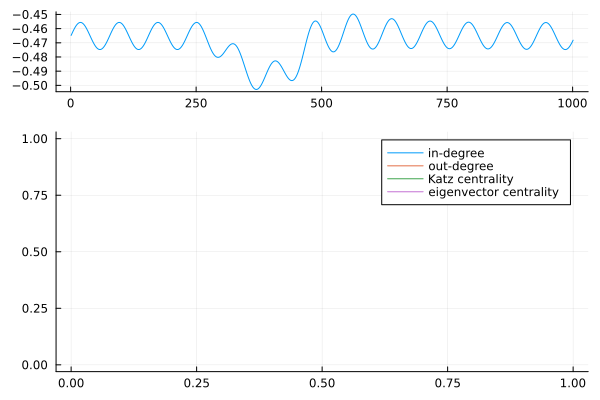

In [21]:
p1 = plot(y_body_3125[end,Int64(70000/20):Int64(90000/20)], legend = :false)

p2 = plot()
plot!(in_deg, label = "in-degree")
plot!(out_deg, label = "out-degree")
plot!(katz, label = "Katz centrality")
plot!(eig, label = "eigenvector centrality")

plot(p1, p2, layout = grid(2,1, heights=[0.25, 0.75]))

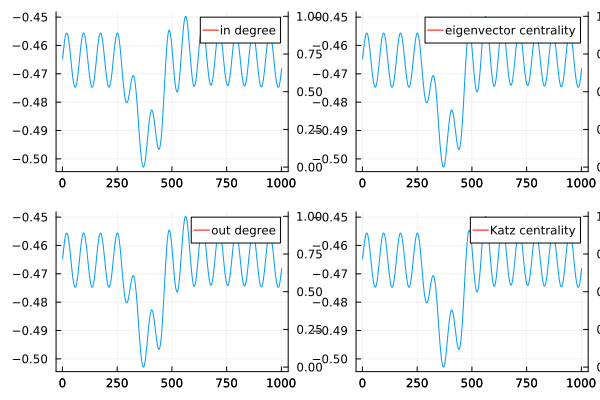

In [22]:
plot(y_body_3125[end,Int64(70000/20):Int64(90000/20)], legend = :false)
p3 = plot!(twinx(), out_deg, label = "out degree", color = :red)

plot(y_body_3125[end,Int64(70000/20):Int64(90000/20)], legend = :false)
p1 = plot!(twinx(), in_deg, label = "in degree", color = :red)

plot(y_body_3125[end,Int64(70000/20):Int64(90000/20)], legend = :false)
p2 = plot!(twinx(), eig, label = "eigenvector centrality", color = :red)

plot(y_body_3125[end,Int64(70000/20):Int64(90000/20)], legend = :false)
p4 = plot!(twinx(), katz, label = "Katz centrality", color = :red)

plot(p1, p2, p3, p4, layout = grid(2,2))

# P-Z Map
---


$$ s_{i,k} = \sum_{j,c_{j} \in \hat{C}_k} A_{ji} $$

   $$ s_i^{intra} = \sum_{j,c_{j} = c_{i}} A_{ji} = s_{i,c_{i}}$$
   
   $$ s_i^{inter} = \sum_{j,c_{j} \neq c_{i}} A_{ji} = \sum_{k,k \neq c_{i}} s_{i,k} $$

  $$  Z_i = \frac{s_i^{intra} - \overline{s_i^{intra}}}{\sigma_{s_{i}^{intra}}}$$


  $$  P_i = 1 - \left [ \left ( \frac{s_i^{intra}}{s_i} \right )^2 + \sum_{k,k \neq c_{i}} \left ( \frac{s_{i,k}}{s_i} \right )^2 \right ]$$


$$ s_i = \text{ node strength (vorticity)} $$

In [23]:
itr = 500

n_structure = size(network_info_625[itr,:][5])[1];

# Strength of node (vorticity)
# ------------------------------------------------------------
# s_struc = abs.(network_info_625[itr,:][5])
# s_fluid = abs.(network_info_625[itr,:][4])
# s = vcat(s_struc, s_fluid); 

s = sum(abs.(network_info_625[itr,:][3]), dims = 2);


# Sum of strength of node out-degree within community
# ------------------------------------------------------------
s_intra_struc = sum(abs.(network_info_625[itr,:][2]), dims = 1)';
s_intra_fluid = sum(abs.(network_info_625[itr,:][1]), dims = 1)';
s_intra = vcat(s_intra_struc, s_intra_fluid); 


# Strength of node out-degree between communities
# ------------------------------------------------------------
s_k_struc = sum(abs.(network_info_625[itr,:][3][1:n_structure, (n_structure + 1):end]), dims = 2);
s_k_fluid = sum(abs.(network_info_625[itr,:][3][(n_structure + 1):end, 1:n_structure]), dims = 2);
s_k = vcat(s_k_struc, s_k_fluid);


Z = ((s_intra .- mean(s_intra))./std(s_intra));
P = 1 .- ((s_intra./s).^2 .+ (s_k./s).^2);


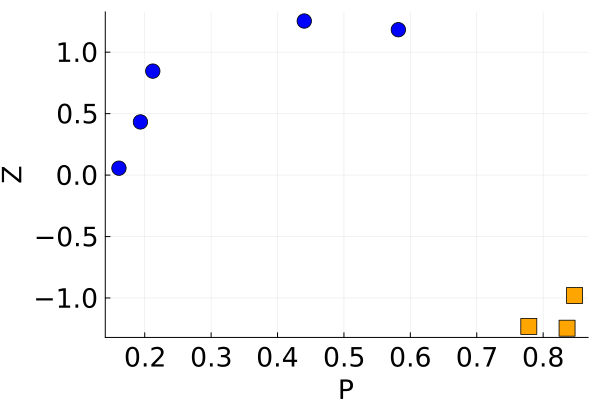

In [24]:
f_new_size = 18

plot(xlabel = "P", ylabel = "Z")
scatter!(P[1:n_structure], Z[1:n_structure], label = "Structure", markersize = 8, c = :orange, marker = :square)
scatter!(P[(n_structure + 1):8], Z[(n_structure + 1):end], label = "Fluid", markersize = 8, c = :blue)
# plot!(legend = :false)

p_save = plot!(size = (600, 400), xtickfontsize = f_new_size, ytickfontsize = f_new_size, labelfontsize = f_new_size, legendfontsize = f_new_size, legend = :false)

savefig(p_save,"./publication_plots/pz_test.png")

p_save


In [25]:
P

9×1 Matrix{Float64}:
  0.8360031507827701
  0.8472331793160826
  0.7783681455436706
  0.4402428834352825
  0.5819328499907109
  0.2121618146983435
  0.19351428603939103
  0.16119372072906157
 -0.16577653453153762

In [26]:
Z

9×1 Matrix{Float64}:
 -1.2458526147384539
 -0.9796221086735879
 -1.2312156581857903
  1.253182979090633
  1.182522959667346
  0.8457693437941273
  0.4323355323166267
  0.056069692039106514
 -0.31319012531000484

In [27]:
using MAT

In [28]:
file = matopen("adj.mat", "w")
write(file, "adj", network_info_625[itr,:][3])
close(file)

In [29]:
(network_info_625[itr,:][3])

9×9 Matrix{Float64}:
 0.0        0.774027   0.399736   …  0.0562251  0.040364   0.0321629
 0.653952   0.0        0.698371      0.0508776  0.0356546  0.02823
 0.413289   0.85463    0.0           0.0666614  0.0455543  0.0358489
 0.698361   0.897473   0.890775      0.127389   0.0882548  0.068328
 0.437567   0.577238   0.813038      0.17614    0.112385   0.0861011
 0.112838   0.124057   0.136197   …  0.195551   0.0996163  0.0666366
 0.0709804  0.0760231  0.0813958     0.0        0.162165   0.0946895
 0.0488756  0.0511004  0.0533514     0.155542   0.0        0.167121
 0.0336471  0.0349553  0.0362733     0.0784666  0.144386   0.0

In [30]:
P_hist = []
Z_hist = []
n_struc_hist = []

for itr = 76:1:97

    n_structure = size(network_info_625[itr,:][5])[1];

    # Strength of node (vorticity)
    # ------------------------------------------------------------
# s_struc = abs.(network_info_625[itr,:][5])
# s_fluid = abs.(network_info_625[itr,:][4])
# s = vcat(s_struc, s_fluid); 

s = sum(network_info_625[itr,:][3], dims = 2);


    # Sum of strength of node out-degree within community
    # ------------------------------------------------------------
    s_intra_struc = sum(abs.(network_info_625[itr,:][2]), dims = 1)';
    s_intra_fluid = sum(abs.(network_info_625[itr,:][1]), dims = 1)';
    s_intra = vcat(s_intra_struc, s_intra_fluid); 


    # Strength of node out-degree between communities
    # ------------------------------------------------------------
    s_k_struc = sum(abs.(network_info_625[itr,:][3][1:n_structure, (n_structure + 1):end]), dims = 2);
    s_k_fluid = sum(abs.(network_info_625[itr,:][3][(n_structure + 1):end, 1:n_structure]), dims = 2);
    s_k = vcat(s_k_struc, s_k_fluid);


    Z = ((s_intra .- mean(s_intra))./std(s_intra));
    P = 1 .- ((s_intra./s).^2 .+ (s_k./s).^2);

    push!(P_hist, P)
    push!(Z_hist, Z)
    push!(n_struc_hist, n_structure)

end

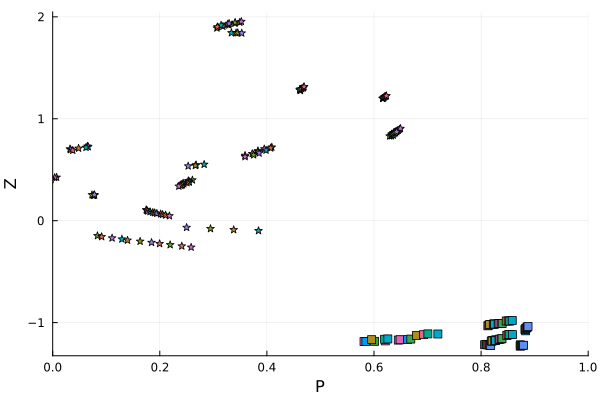

In [31]:
plot(xlabel = "P", ylabel = "Z")

for i = 1:1:size(n_struc_hist)[1]

    n_structure = n_struc_hist[1]
    scatter!(P_hist[i][1:n_structure], Z_hist[i][1:n_structure], label = "Structure", markershape = :square)
    scatter!(P_hist[i][(n_structure + 1):end], Z_hist[i][(n_structure + 1):end], label = "Fluid", markershape = :star5)

end

plot!(legend = :false, xlim = (0, 1))

# Oscillator P-Z Map
---

In [32]:
adj = vars = matread("sam_pz.mat")

Dict{String, Any} with 1 entry:
  "a" => [0.0 0.188187 … 0.0592773 0.0502974; 1.62125 0.0 … 0.0713219 0.0516091…

In [33]:
a = adj["a"]

7×7 Matrix{Float64}:
  0.0        0.188187  0.00562097  0.211277  0.126429   0.0592773  0.0502974
  1.62125    0.0       0.01628     0.134182  0.0720691  0.0713219  0.0516091
 26.7449    28.1926    0.0         6.08658   2.68313    0.831559   0.926022
  0.891217   0.872423  0.00216799  0.0       0.539911   0.233403   0.00297022
  2.19611    2.0387    0.00601147  0.487567  0.0        0.268567   0.0756109
  5.48575    5.29185   0.0137009   1.1098    1.41432    0.0        0.0918797
  2.79597    2.638     0.0102861   1.86029   2.74147    0.959055   0.0

In [34]:
a[1:3,1:3]

3×3 Matrix{Float64}:
  0.0       0.188187  0.00562097
  1.62125   0.0       0.01628
 26.7449   28.1926    0.0

In [35]:
a[4:7,4:7]

4×4 Matrix{Float64}:
 0.0       0.539911  0.233403  0.00297022
 0.487567  0.0       0.268567  0.0756109
 1.1098    1.41432   0.0       0.0918797
 1.86029   2.74147   0.959055  0.0

In [36]:
n_structure = 3;

# Strength of node (vorticity)
# ------------------------------------------------------------
# s_struc = abs.(network_info_625[itr,:][5])
# s_fluid = abs.(network_info_625[itr,:][4])
# s = vcat(s_struc, s_fluid); 

s = sum(abs.(a'), dims = 2);


# Sum of strength of node out-degree within community
# ------------------------------------------------------------
s_intra_struc = sum(abs.(a'[1:n_structure,1:n_structure]), dims = 1)';
s_intra_fluid = sum(abs.(a'[(n_structure+1):7,(n_structure+1):7]), dims = 1)';
s_intra = vcat(s_intra_struc, s_intra_fluid); 


# Strength of node out-degree between communities
# ------------------------------------------------------------
s_k_struc = sum(a'[1:n_structure, (n_structure + 1):end], dims = 2);
s_k_fluid = sum(a'[(n_structure + 1):end, 1:n_structure], dims = 2);
s_k = vcat(s_k_struc, s_k_fluid);


Z = ((s_intra .- mean(s_intra))./std(s_intra));
P = 1 .- ((s_intra./s).^2 .+ (s_k./s).^2);


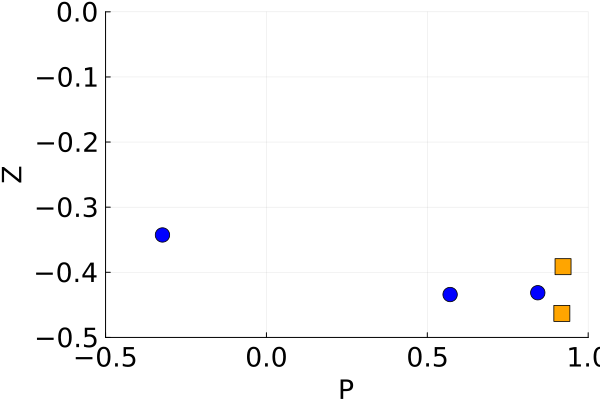

In [37]:
f_new_size = 18

plot(xlabel = "P", ylabel = "Z")
scatter!(P[1:n_structure], Z[1:n_structure], label = "Structure", markersize = 8, c = :orange, marker = :square)
scatter!(P[(n_structure + 1):7], Z[(n_structure + 1):end], label = "Fluid", markersize = 8, c = :blue)
# plot!(legend = :false)

p_save = plot!(size = (600, 400), xtickfontsize = f_new_size, ytickfontsize = f_new_size, labelfontsize = f_new_size, legendfontsize = f_new_size, legend = :false, xlim = (-0.5, 1), ylim = (-0.5, 0))

savefig(p_save,"./publication_plots/pz_oscillator.png")

p_save

### Other Network Metrics

In [66]:
in_degree = sum(a, dims = 2);
out_degree = sum(a, dims = 1)';

vals, ~ = eigen(a);


α = ( 1/(abs(real(vals)[1])) - 0.01)

katz = KatzCentrality(a, α);

In [67]:
a

7×7 Matrix{Float64}:
  0.0        0.188187  0.00562097  0.211277  0.126429   0.0592773  0.0502974
  1.62125    0.0       0.01628     0.134182  0.0720691  0.0713219  0.0516091
 26.7449    28.1926    0.0         6.08658   2.68313    0.831559   0.926022
  0.891217   0.872423  0.00216799  0.0       0.539911   0.233403   0.00297022
  2.19611    2.0387    0.00601147  0.487567  0.0        0.268567   0.0756109
  5.48575    5.29185   0.0137009   1.1098    1.41432    0.0        0.0918797
  2.79597    2.638     0.0102861   1.86029   2.74147    0.959055   0.0

In [68]:
eigen(a)

Eigen{ComplexF64, ComplexF64, Matrix{ComplexF64}, Vector{ComplexF64}}
values:
7-element Vector{ComplexF64}:
  -0.8057772356443892 + 0.0im
  -0.6304354687254674 + 0.0im
 -0.44082301622345343 - 0.6287372785147045im
 -0.44082301622345343 + 0.6287372785147045im
 -0.25378419059555557 + 0.0im
 -0.08132483880392902 + 0.0im
   2.6529677662162463 + 0.0im
vectors:
7×7 Matrix{ComplexF64}:
 0.00344193+0.0im   0.0495524+0.0im  …  -0.00612974+0.0im   0.021832+0.0im
 -0.0249347+0.0im   -0.039596+0.0im      0.00650759+0.0im  0.0342651+0.0im
   0.980351+0.0im   -0.177782+0.0im        0.988222+0.0im   0.941308+0.0im
 -0.0450107+0.0im  -0.0135965+0.0im      0.00927969+0.0im  0.0536799+0.0im
  0.0473084+0.0im    0.368953+0.0im     -0.00794822+0.0im  0.0833008+0.0im
   0.118706+0.0im   -0.852237+0.0im  …   0.00699041+0.0im   0.194035+0.0im
  -0.141151+0.0im   -0.318986+0.0im       -0.152115+0.0im   0.254595+0.0im

In [69]:
real(vals)[1]

-0.8057772356443892

In [70]:
α 

1.2310377903022895

In [71]:
katz

7-element Vector{Float64}:
   0.02632140148929233
  -0.06940701133799125
 -16.83816264570929
  -0.4465270400962473
  -0.9225665024316905
  -2.503041006757774
  -6.439296585763557

In [72]:
in_degree

7×1 Matrix{Float64}:
  0.6410877250746376
  1.9667163365160185
 65.46473365044893
  2.5420927538167675
  5.072568182661251
 13.407298944082212
 11.005067265824177

In [73]:
out_degree

7×1 adjoint(::Matrix{Float64}) with eltype Float64:
 39.73519592071256
 39.22170504835428
  0.05406738764786123
  9.889697197129093
  7.5773253174964506
  2.423184174938611
  1.198389812145124

In [95]:
6/4

1.5

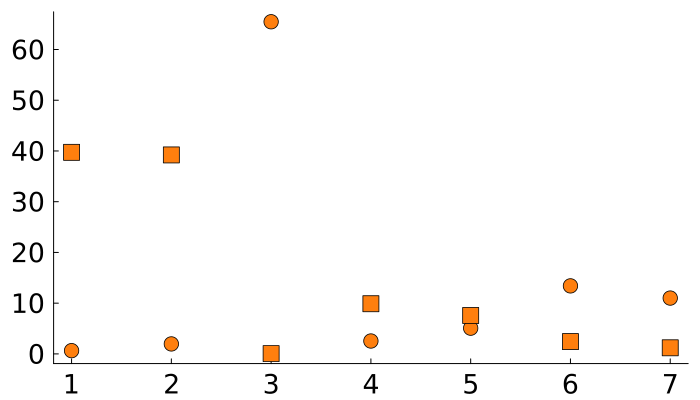

In [111]:
plot()
scatter!(in_degree, label = "in-degre", markersize = 8, color = palette(:tab10)[2])
scatter!(out_degree, markershape = :square, label = "out-degre", markersize = 8, color = palette(:tab10)[2])
# scatter!(katz, markershape = :diamond, label = "Katz centrality", markersize = 8, color = palette(:tab10)[2])


p_save = plot!(size = (700, 400), tickfontsize = f_new_size, legend = :false, grid = :false)

savefig(p_save,"./publication_plots/centrality_oscillator_structure.png")

p_save

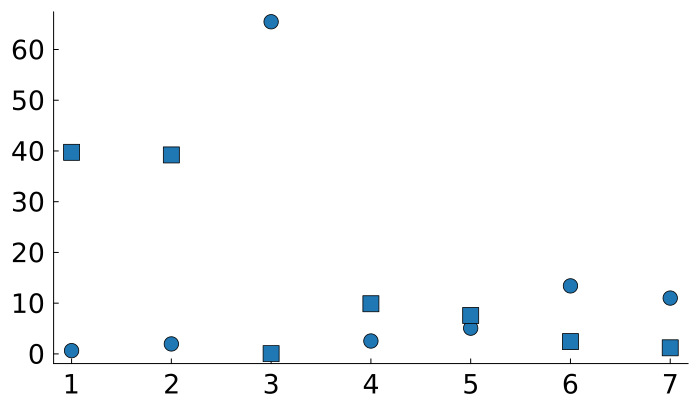

In [112]:
plot()
scatter!(in_degree, label = "in-degre", markersize = 8, color = palette(:tab10)[1])
scatter!(out_degree, markershape = :square, label = "out-degre", markersize = 8, color = palette(:tab10)[1])
# scatter!(katz, markershape = :diamond, label = "Katz centrality", markersize = 8, color = palette(:tab10)[1])


p_save = plot!(size = (700, 400), tickfontsize = f_new_size, legend = :false, grid = :false)

savefig(p_save,"./publication_plots/centrality_oscillator_fluid.png")

p_save


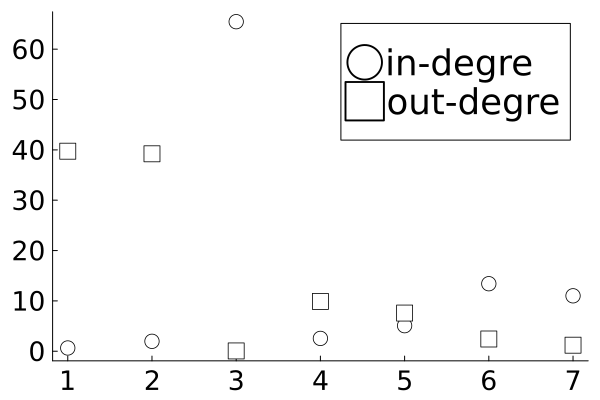

In [113]:
plot()
scatter!(in_degree, label = "in-degre", markersize = 8, color = :white)
scatter!(out_degree, markershape = :square, label = "out-degre", markersize = 8, color = :white)
# scatter!(katz, markershape = :diamond, label = "Katz centrality", markersize = 8, color = :white)

p_save = plot!(size = (600, 400), xtickfontsize = f_new_size, ytickfontsize = f_new_size, labelfontsize = f_new_size, legendfontsize = 24, grid = :false)

savefig(p_save,"./publication_plots/centrality_oscillator_legend.png")

p_save

In [91]:
palette(:tab10)[2]

In [88]:
:tab10[1]

MethodError: MethodError: no method matching getindex(::Symbol, ::Int64)

In [46]:
out_degree = sum(a', dims = 2)

7×1 Matrix{Float64}:
 39.73519592071256
 39.22170504835428
  0.05406738764786123
  9.889697197129093
  7.5773253174964506
  2.423184174938611
  1.198389812145124

In [47]:
a

7×7 Matrix{Float64}:
  0.0        0.188187  0.00562097  0.211277  0.126429   0.0592773  0.0502974
  1.62125    0.0       0.01628     0.134182  0.0720691  0.0713219  0.0516091
 26.7449    28.1926    0.0         6.08658   2.68313    0.831559   0.926022
  0.891217   0.872423  0.00216799  0.0       0.539911   0.233403   0.00297022
  2.19611    2.0387    0.00601147  0.487567  0.0        0.268567   0.0756109
  5.48575    5.29185   0.0137009   1.1098    1.41432    0.0        0.0918797
  2.79597    2.638     0.0102861   1.86029   2.74147    0.959055   0.0

In [48]:
0.0      +  0.188187 + 0.00562097 + 0.211277  +0.126429 +  0.0592773 + 0.0502974

0.64108867

In [49]:
a'

7×7 adjoint(::Matrix{Float64}) with eltype Float64:
 0.0         1.62125    26.7449    …  2.19611     5.48575    2.79597
 0.188187    0.0        28.1926       2.0387      5.29185    2.638
 0.00562097  0.01628     0.0          0.00601147  0.0137009  0.0102861
 0.211277    0.134182    6.08658      0.487567    1.1098     1.86029
 0.126429    0.0720691   2.68313      0.0         1.41432    2.74147
 0.0592773   0.0713219   0.831559  …  0.268567    0.0        0.959055
 0.0502974   0.0516091   0.926022     0.0756109   0.0918797  0.0